In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice")
l_hex = 6.1
n_hex = 100
ks = [1, 50, 100, 150, 200]
nk = len(ks)

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlet"

# f_type: 0 - parallel flow, 1 - counter flow
f_type = 0

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/parallel_day_{k}.csv", header=0)')
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/counter_day_{k}.csv", header=0)')

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1R,...,F2Re,F2h,F2R,F2Cf,F2Tau,dP2,Sigma2,Rf2,UA,Q
0,1,0.279225,573.435701,641.158939,1.001530,0.019860,4972.598904,105.037535,634.667887,0.413994,...,17514.404352,2252.440742,0.091208,0.027061,2.746227,484.161340,0.0,0.0,1.973089,35929.102700
1,2,0.286795,565.990302,631.101969,1.039296,0.019758,5133.684977,107.750957,654.413409,0.403569,...,17479.478118,2248.846673,0.091354,0.027075,2.736704,482.482582,0.0,0.0,1.775027,35480.060340
2,3,0.341693,579.280136,629.897745,1.248886,0.019674,6142.609976,124.382729,758.666672,0.349606,...,16131.171269,2108.967069,0.097413,0.027649,2.380203,419.631216,0.0,0.0,1.751195,32861.800767
3,4,0.270345,572.066554,630.178107,0.994388,0.019612,4875.398356,103.391726,632.634135,0.420585,...,18125.730335,2315.119901,0.088739,0.026822,2.915228,513.956347,0.0,0.0,1.482568,29849.274308
4,5,0.251797,578.141259,629.547558,0.933707,0.019532,4559.361837,97.994317,602.044479,0.443751,...,18063.252582,2308.733690,0.088984,0.026846,2.897754,510.875680,0.0,0.0,1.332467,24593.554929


In [4]:
days = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

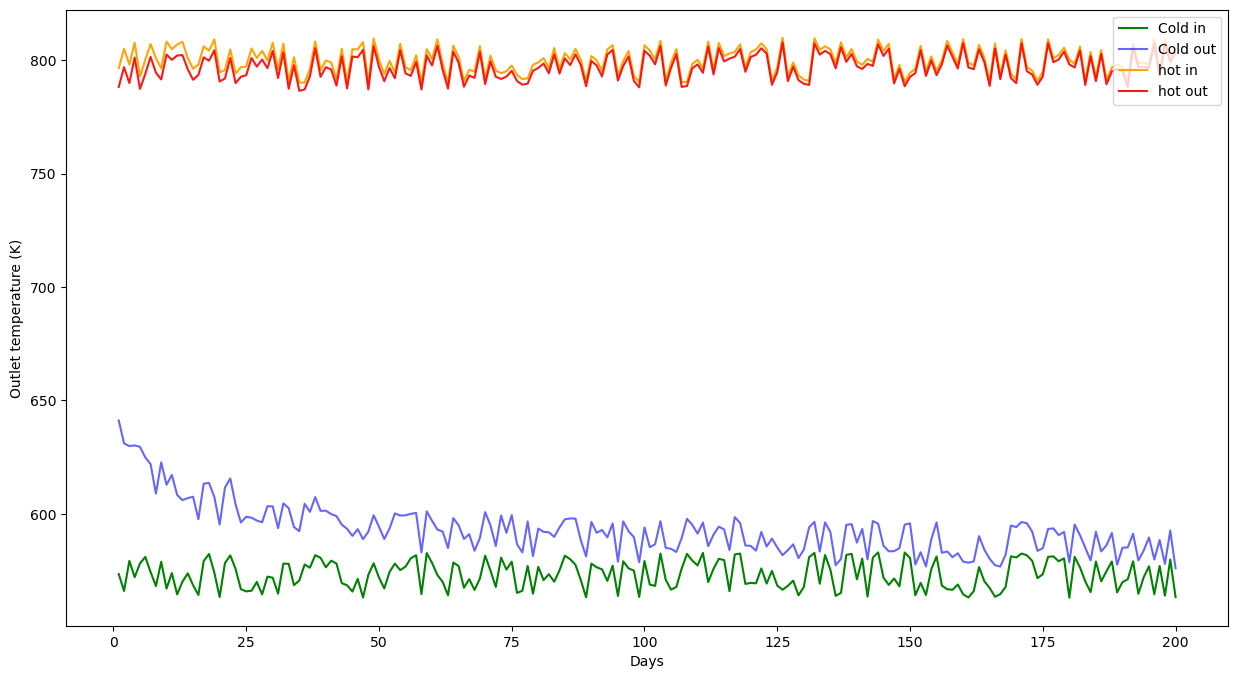

In [5]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(days, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(days, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(days, dfs["F2i"].to_numpy(), c="orange", label="hot in")
ax.plot(days, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


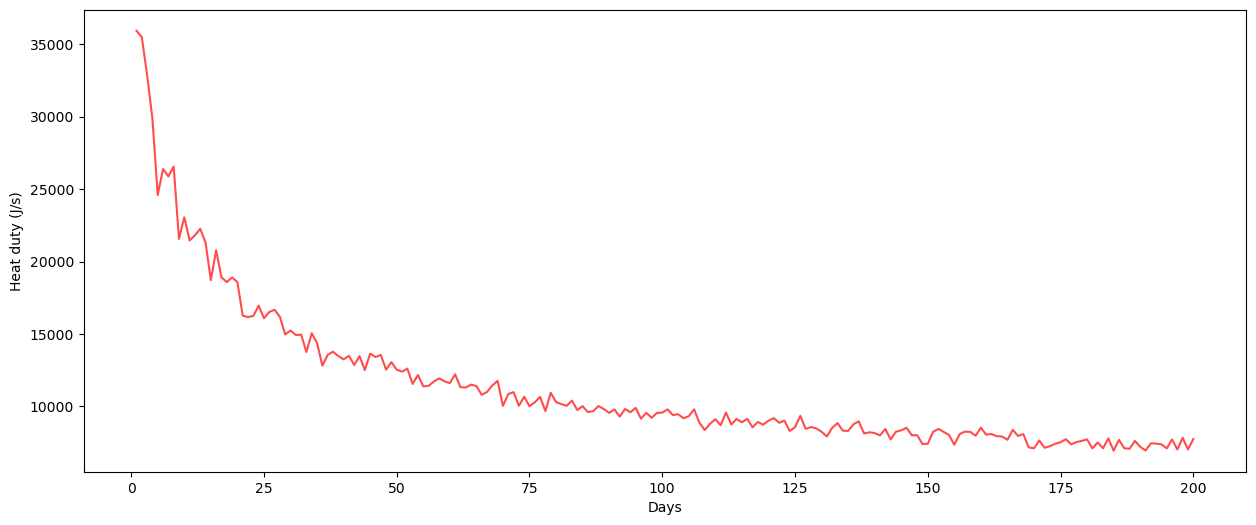

In [6]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

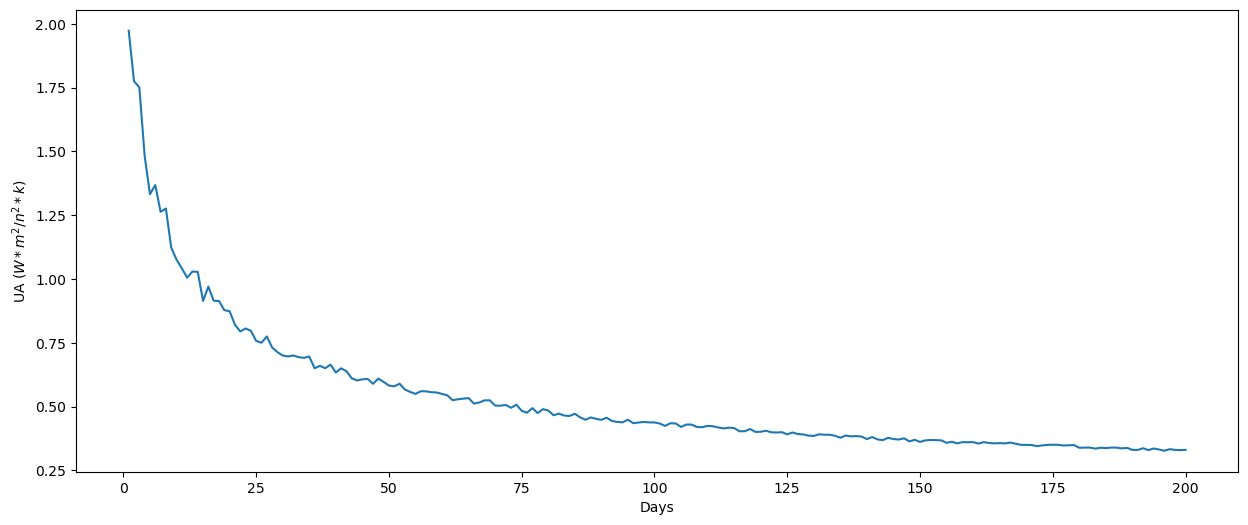

In [7]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["UA"].to_numpy())
plt.ylabel("UA ($W*m^2/n^2*k$)")
plt.xlabel("Days")
plt.show()

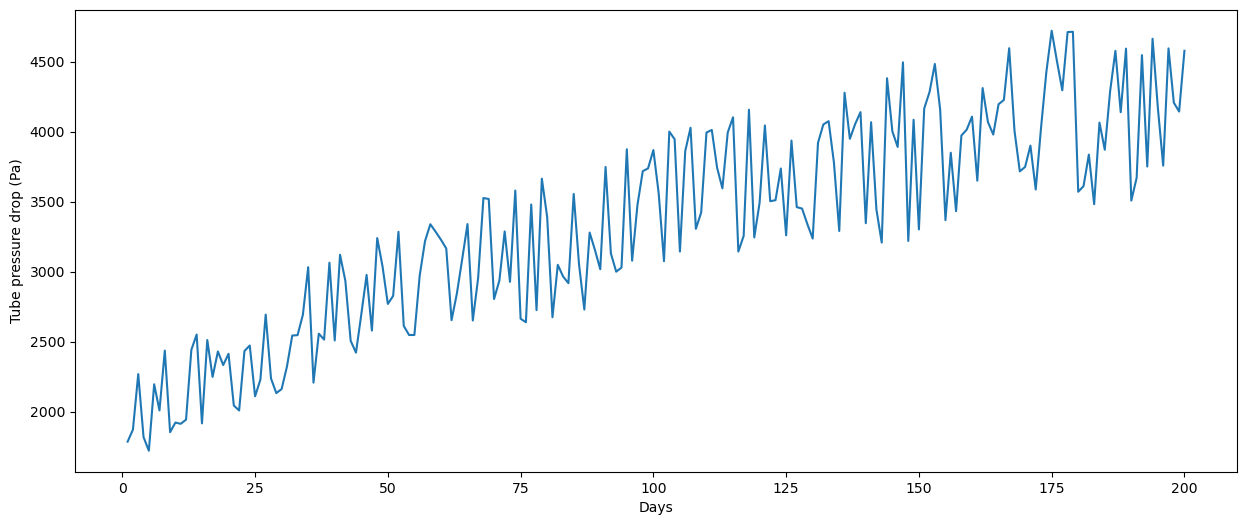

In [8]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["dP1"].to_numpy())
plt.ylabel("Tube pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

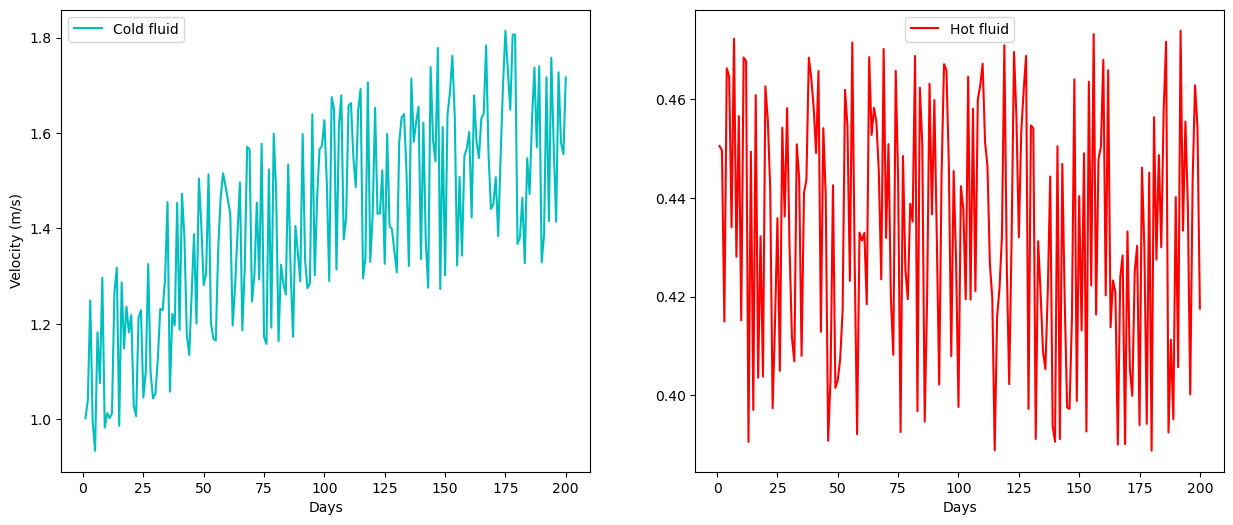

In [9]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


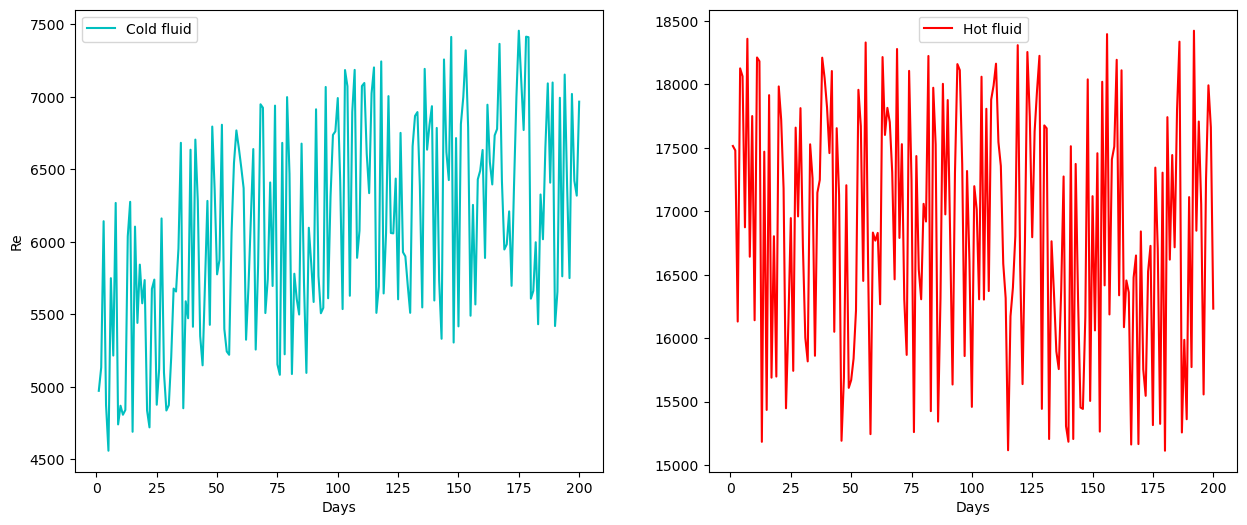

In [10]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


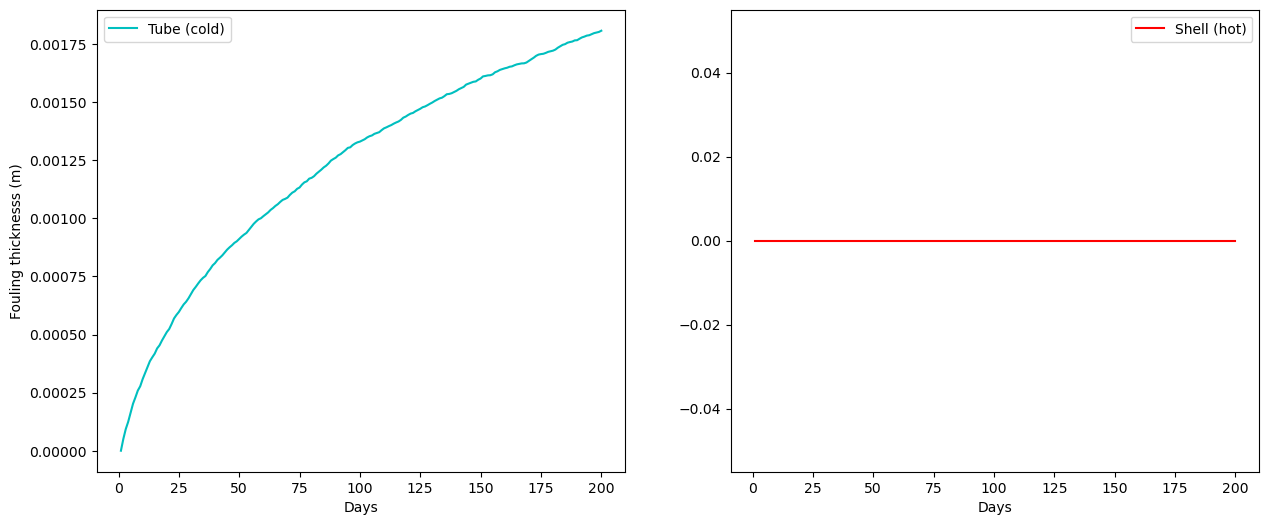

In [11]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(days, dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()

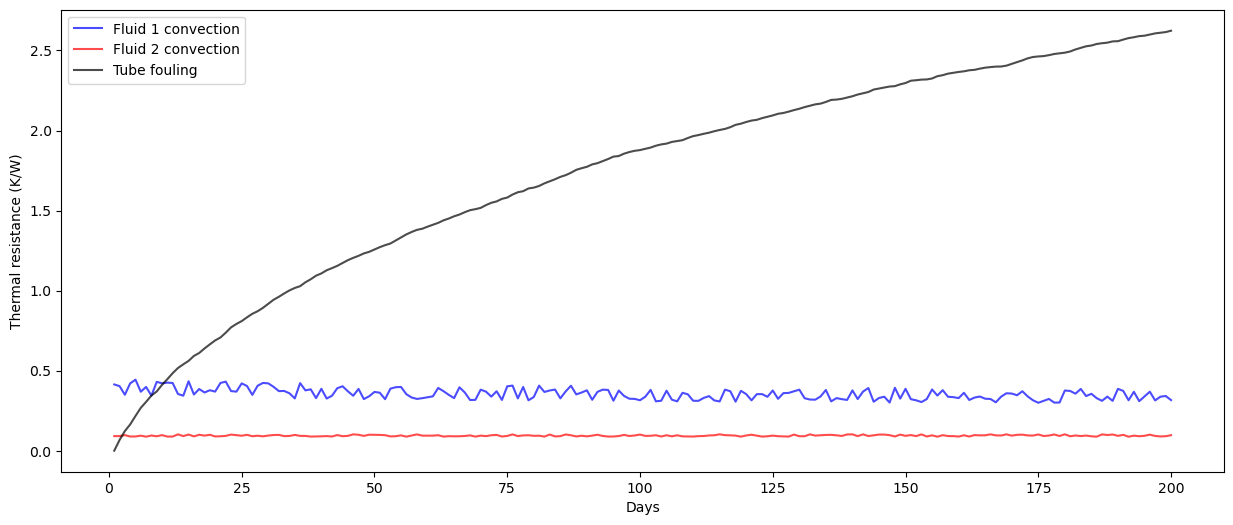

In [12]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["F1R"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(days, dfs["F2R"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(days, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Thermal resistance (K/W)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

In [13]:
x = [i * l_hex / n_hex for i in range(n_hex)]

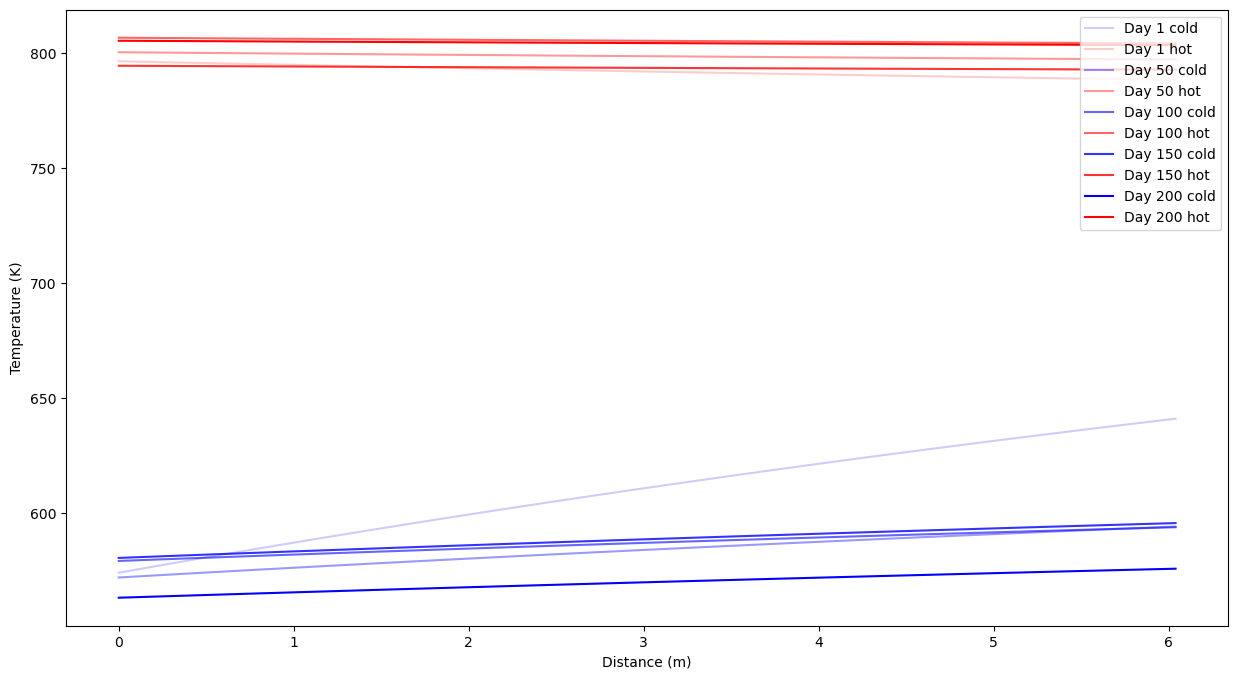

In [14]:
# temperatures vs. distance
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["F1T"].to_numpy(), c="blue", alpha={1 / nk * i}, label="Day {k} cold")')
    exec(f'ax.plot(x, df_day{k}["F2T"].to_numpy(), c="red", alpha={1 / nk * i}, label="Day {k} hot")')
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

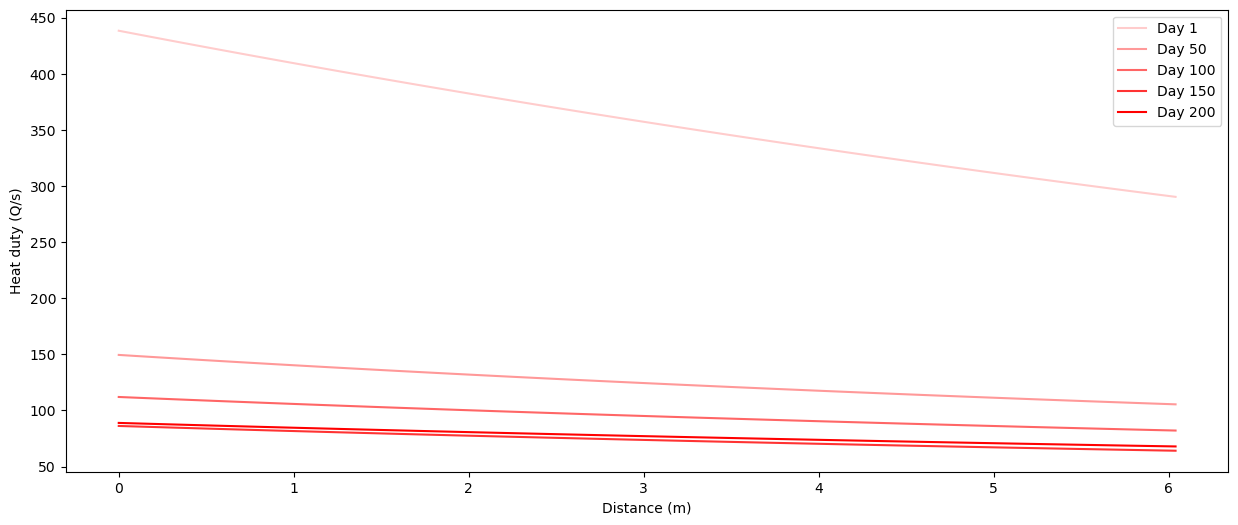

In [15]:
# heat duty vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Q"].to_numpy(), c="r", alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

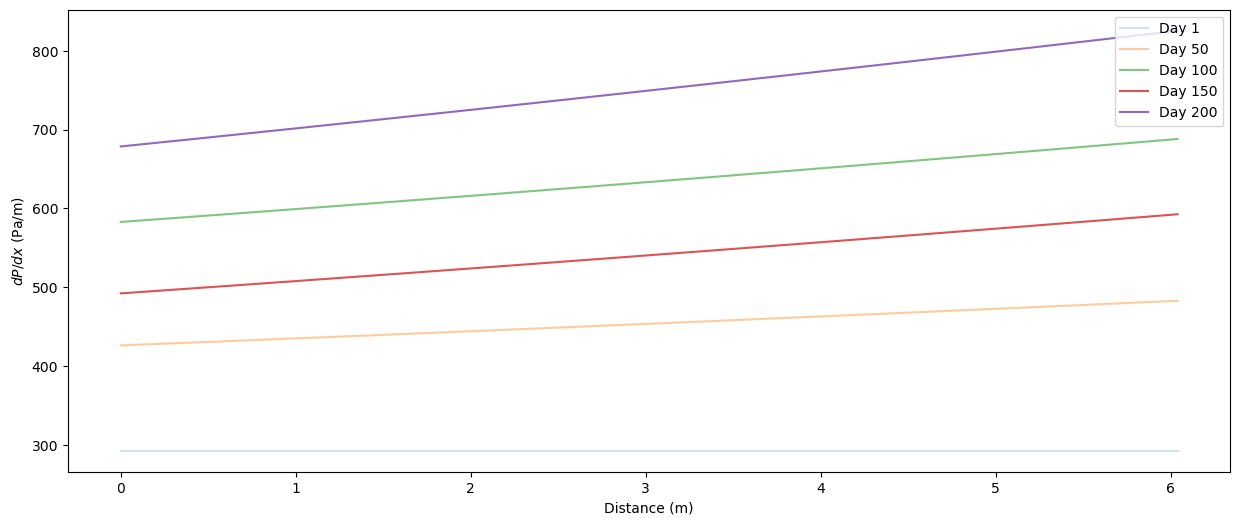

In [16]:
# pressure drop vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["dP1/dx"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("$dP/dx$ (Pa/m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

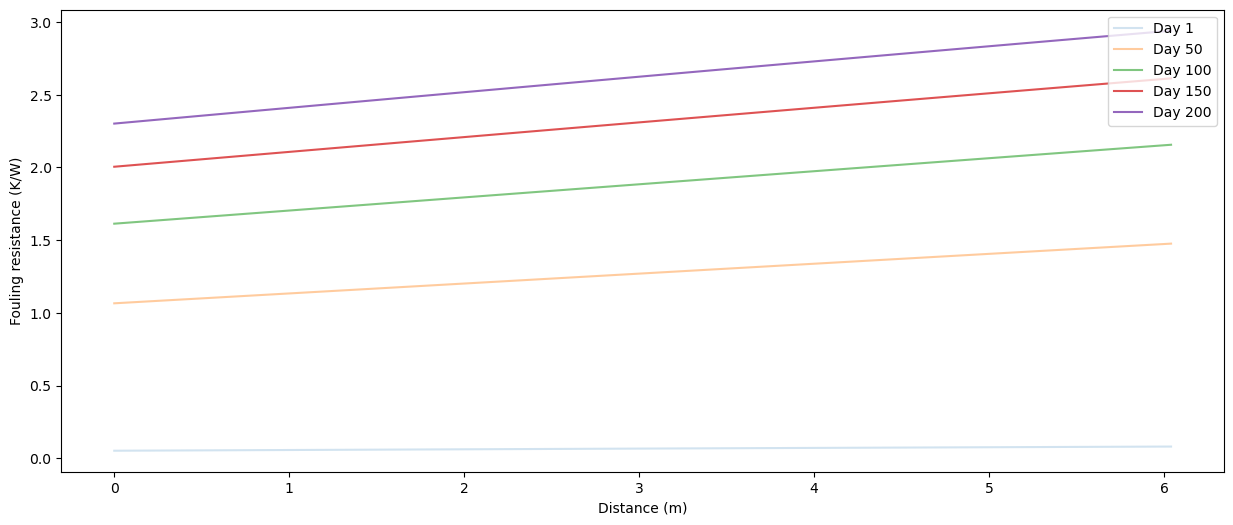

In [17]:
# fouling resistance vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Rf1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling resistance (K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

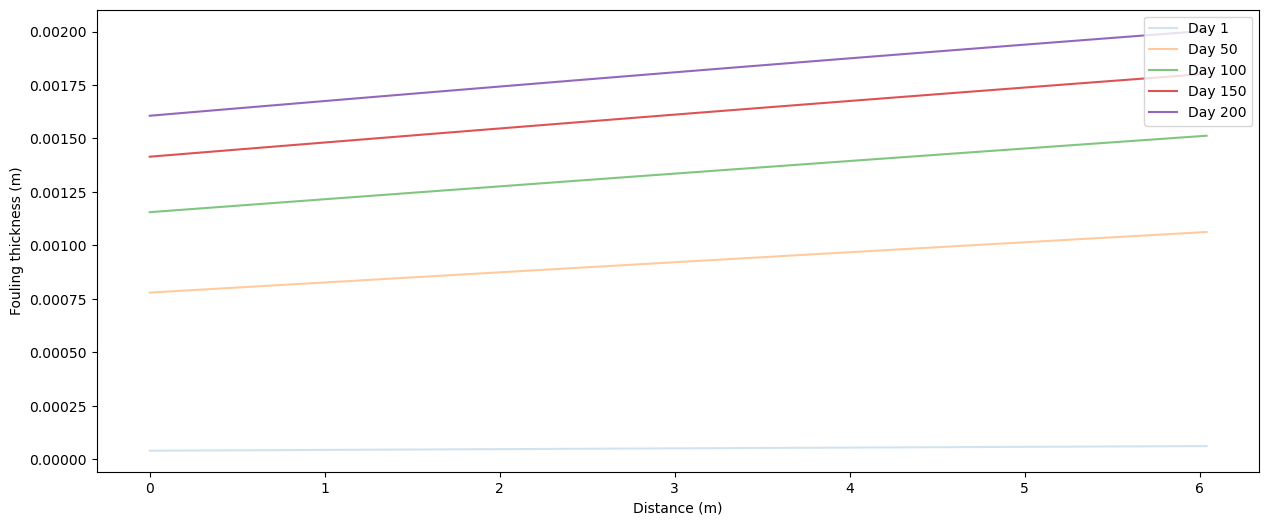

In [18]:
# fouling thickness vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Sigma1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()